# Tennis Racquet Data Cleaning Steps & EDA
___ 

In [1]:
import re
import numpy as np
import pandas as pd
import typer
from pathlib import Path
from loguru import logger
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import os
print(os.getcwd())
print((Path("data/raw") / "tennis_racquets.csv").exists())

c:\Users\ericm\pyproj\tennis-racquet-analysis\notebooks
False


In [3]:
%cd ..

c:\Users\ericm\pyproj\tennis-racquet-analysis


In [4]:
print(os.getcwd())
(Path("data/raw") / "tennis_racquets.csv").exists()

c:\Users\ericm\pyproj\tennis-racquet-analysis


True

## Raw Data Ingestion Execution

In [5]:
from tennis_racquet_analysis.data_ingestion import main
df = main("tennis_racquets.csv", preview=False)
assert df.shape == (31, 7)

2025-04-24 23:00:29.412 | INFO     | tennis_racquet_analysis.config:<module>:11 - PROJ_ROOT path is: C:\Users\ericm\pyproj\tennis-racquet-analysis


2025-04-24 23:00:29.417 | INFO     | tennis_racquet_analysis.data_ingestion:main:18 - Starting data ingestion pipeline...


Finalizing Data Ingestion: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 119.95it/s]

2025-04-24 23:00:29.419 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:7 - Looking for file at: C:\Users\ericm\pyproj\tennis-racquet-analysis\data\raw\tennis_racquets.csv
2025-04-24 23:00:29.425 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:10 - Data loaded successfully!
2025-04-24 23:00:29.428 | INFO     | tennis_racquet_analysis.data_ingestion:main:27 - Ingested DataFrame type: <class 'pandas.core.frame.DataFrame'>
2025-04-24 23:00:29.428 | INFO     | tennis_racquet_analysis.data_ingestion:main:28 - DataFrame dimensions: (31, 7)
2025-04-24 23:00:29.428 | SUCCESS  | tennis_racquet_analysis.data_ingestion:main:29 - Completed data ingestion from WindowsPath('C:/Users/ericm/pyproj/tennis-racquet-analysis/data/raw/tennis_racquets.csv')


In [6]:
df.head()

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
0,Asics109,27.25,10.4,0.375,321,109,25.0
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
3,BabolatPureDrive,27.00,11.1,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.3,0.375,298,100,25.0


In [7]:
len(df)

31

In [8]:
df.shape

(31, 7)

In [9]:
df.count()

Racquet          31
length           31
static.weight    31
balance          31
swingweight      31
headsize         31
beamwidth        31
dtype: int64

In [10]:
df.dtypes

Racquet           object
length           float64
static.weight    float64
balance          float64
swingweight        int64
headsize           int64
beamwidth        float64
dtype: object

In [11]:
df.describe()

,length,static.weight,balance,swingweight,headsize,beamwidth
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,27.090323,10.931613,0.466387,310.612903,102.129032,23.887097
std,0.160426,0.695256,0.318315,12.222050,6.731726,2.891683
min,27.000000,9.600000,-0.375000,280.000000,93.000000,19.000000
25%,27.000000,10.450000,0.354000,303.000000,98.000000,21.500000
50%,27.000000,11.000000,0.500000,312.000000,100.000000,23.500000
75%,27.225000,11.400000,0.625000,320.000000,107.000000,26.000000
max,27.600000,12.200000,1.000000,330.000000,125.000000,29.000000


In [12]:
df.Racquet.value_counts().head()

Racquet
Asics109                1
Asics116                1
Asics125                1
BabolatPureDrive        1
BabolatPureDriveLite    1
Name: count, dtype: int64

In [13]:
df.sort_values(by='swingweight', ascending=False).head()

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
16,HeadRadicalPro,27.0,11.5,0.500,330,98,21.5
18,PrinceRebel95,27.0,12.0,0.875,330,95,20.0
9,GammaRZR98T,27.0,11.9,0.875,328,98,22.0
19,PrinceRebel98,27.0,11.1,0.500,322,98,21.0
28,YonexEZone98,27.0,11.5,0.750,321,98,24.0


## Beginner Players Racquets Characteristics
___

In [14]:
df[(df["headsize"] > 105)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
0,Asics109,27.25,10.4,0.375,321,109,25.0
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
5,BabolatPureDrive107,27.20,10.4,0.250,298,107,25.0
7,DunlopBiomimetic700,27.25,9.7,-0.375,302,110,28.0
15,HeadRadicalOversize,27.00,11.0,0.500,315,107,21.5
23,VolklOrganixV1Oversize,27.60,10.5,0.375,308,110,29.0
25,WilsonJuice108,27.25,10.4,0.000,312,108,26.0
30,YonexEZone107,27.00,10.5,0.125,307,107,29.0


In [15]:
df[(df["length"] >= 27) & (df["length"] <= 29)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
0,Asics109,27.25,10.40,0.375,321,109,25.0
1,Asics116,27.25,9.60,0.000,287,116,25.0
2,Asics125,27.50,9.60,0.000,303,125,28.0
3,BabolatPureDrive,27.00,11.10,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.30,0.375,298,100,25.0
5,BabolatPureDrive107,27.20,10.40,0.250,298,107,25.0
6,DonnayProOne,27.00,11.50,0.625,318,97,21.0
7,DunlopBiomimetic700,27.25,9.70,-0.375,302,110,28.0
8,GammaRZR98,27.00,11.00,0.500,310,98,22.0
9,GammaRZR98T,27.00,11.90,0.875,328,98,22.0


In [16]:
df[(df["static.weight"] >= 8) & (df["static.weight"] <= 10.05)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
7,DunlopBiomimetic700,27.25,9.7,-0.375,302,110,28.0


In [17]:
df[(df["swingweight"] >= 280) & (df["swingweight"] <= 315)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
1,Asics116,27.25,9.60,0.000,287,116,25.0
2,Asics125,27.50,9.60,0.000,303,125,28.0
3,BabolatPureDrive,27.00,11.10,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.30,0.375,298,100,25.0
5,BabolatPureDrive107,27.20,10.40,0.250,298,107,25.0
7,DunlopBiomimetic700,27.25,9.70,-0.375,302,110,28.0
8,GammaRZR98,27.00,11.00,0.500,310,98,22.0
11,HeadPrestigeMidplus,27.00,11.90,1.000,310,98,21.0
13,HeadPrestigeS,27.00,11.30,0.500,315,98,22.0
15,HeadRadicalOversize,27.00,11.00,0.500,315,107,21.5


In [18]:
df[df[("beamwidth")] >= 24]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
0,Asics109,27.25,10.4,0.375,321,109,25.0
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
3,BabolatPureDrive,27.00,11.1,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.3,0.375,298,100,25.0
5,BabolatPureDrive107,27.20,10.4,0.250,298,107,25.0
7,DunlopBiomimetic700,27.25,9.7,-0.375,302,110,28.0
20,PrinceWarrior100,27.00,11.1,0.500,320,100,26.0
22,VolklOrganixV1Midplus,27.00,10.5,0.250,303,102,28.0
23,VolklOrganixV1Oversize,27.60,10.5,0.375,308,110,29.0


In [19]:
mask = (
    (df["headsize"] > 105)
    & df["length"].between(27, 29)
    & df["static.weight"].between(8, 10.05)
    & df["swingweight"].between(280, 315)
    & (df["beamwidth"] >= 24)
)

beginner = df[mask]
beginner

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
7,DunlopBiomimetic700,27.25,9.7,-0.375,302,110,28.0


## Intermediate Players Racquets Characteristics
___

In [20]:
mask = (
    df["headsize"].between(98, 104)
    & (df["length"] == 27)
    & df["static.weight"].between(9.6, 11.5)
    & (df["swingweight"] > 315)
    & df["beamwidth"].between(22, 24)
)

intermediate = df[mask]
intermediate

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
28,YonexEZone98,27.0,11.5,0.75,321,98,24.0


## Advanced Players Racquets Characteristics
___

- In general, heavier racquets are considered to be more than 11 oz.

### Control

In [21]:
df[(df["headsize"] >= 85) & (df["headsize"] <= 97)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
6,DonnayProOne,27.0,11.5,0.625,318,97,21.0
10,HeadPrestigeMid,27.0,12.2,1.000,317,93,19.0
18,PrinceRebel95,27.0,12.0,0.875,330,95,20.0


In [22]:
df[(df["length"]) == 27]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
3,BabolatPureDrive,27.0,11.10,0.500,308,100,26.0
4,BabolatPureDriveLite,27.0,10.30,0.375,298,100,25.0
6,DonnayProOne,27.0,11.50,0.625,318,97,21.0
8,GammaRZR98,27.0,11.00,0.500,310,98,22.0
9,GammaRZR98T,27.0,11.90,0.875,328,98,22.0
10,HeadPrestigeMid,27.0,12.20,1.000,317,93,19.0
11,HeadPrestigeMidplus,27.0,11.90,1.000,310,98,21.0
12,HeadPrestigePro,27.0,12.00,0.750,321,98,21.0
13,HeadPrestigeS,27.0,11.30,0.500,315,98,22.0
14,HeadRadicalMidplus,27.0,11.00,0.333,320,98,21.5


In [23]:
df[(df["static.weight"] >= 11.6) & (df["static.weight"] <= 12.6)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
9,GammaRZR98T,27.0,11.9,0.875,328,98,22.0
10,HeadPrestigeMid,27.0,12.2,1.000,317,93,19.0
11,HeadPrestigeMidplus,27.0,11.9,1.000,310,98,21.0
12,HeadPrestigePro,27.0,12.0,0.750,321,98,21.0
18,PrinceRebel95,27.0,12.0,0.875,330,95,20.0


In [24]:
mask = (
    df["headsize"].between(85, 97)
    & (df["length"] == 27)
    & df["static.weight"].between(11.6, 12.6)
)

control = df[mask]
control

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
10,HeadPrestigeMid,27.0,12.2,1.000,317,93,19.0
18,PrinceRebel95,27.0,12.0,0.875,330,95,20.0


### Modern Player's

In [25]:
df[(df["headsize"] >= 98) & (df["headsize"] <= 100)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
3,BabolatPureDrive,27.00,11.10,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.30,0.375,298,100,25.0
8,GammaRZR98,27.00,11.00,0.500,310,98,22.0
9,GammaRZR98T,27.00,11.90,0.875,328,98,22.0
11,HeadPrestigeMidplus,27.00,11.90,1.000,310,98,21.0
12,HeadPrestigePro,27.00,12.00,0.750,321,98,21.0
13,HeadPrestigeS,27.00,11.30,0.500,315,98,22.0
14,HeadRadicalMidplus,27.00,11.00,0.333,320,98,21.5
16,HeadRadicalPro,27.00,11.50,0.500,330,98,21.5
17,HeadRadicalS,27.00,10.40,0.500,290,100,23.5


In [26]:
df[(df["length"]) == 27]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
3,BabolatPureDrive,27.0,11.10,0.500,308,100,26.0
4,BabolatPureDriveLite,27.0,10.30,0.375,298,100,25.0
6,DonnayProOne,27.0,11.50,0.625,318,97,21.0
8,GammaRZR98,27.0,11.00,0.500,310,98,22.0
9,GammaRZR98T,27.0,11.90,0.875,328,98,22.0
10,HeadPrestigeMid,27.0,12.20,1.000,317,93,19.0
11,HeadPrestigeMidplus,27.0,11.90,1.000,310,98,21.0
12,HeadPrestigePro,27.0,12.00,0.750,321,98,21.0
13,HeadPrestigeS,27.0,11.30,0.500,315,98,22.0
14,HeadRadicalMidplus,27.0,11.00,0.333,320,98,21.5


In [27]:
df[(df["static.weight"] >= 11) & (df["static.weight"] <= 11.4)]

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
3,BabolatPureDrive,27.00,11.1,0.500,308,100,26.0
8,GammaRZR98,27.00,11.0,0.500,310,98,22.0
13,HeadPrestigeS,27.00,11.3,0.500,315,98,22.0
14,HeadRadicalMidplus,27.00,11.0,0.333,320,98,21.5
15,HeadRadicalOversize,27.00,11.0,0.500,315,107,21.5
19,PrinceRebel98,27.00,11.1,0.500,322,98,21.0
20,PrinceWarrior100,27.00,11.1,0.500,320,100,26.0
24,WilsonJuice100,27.00,11.3,0.500,315,100,26.5
27,WilsonSteam100,27.25,11.0,0.625,311,100,23.0
29,YonexEZone100,27.00,11.0,0.375,312,100,27.0


In [28]:
mask = (
    df["headsize"].between(98, 100)
    & (df["length"] == 27)
    & df["static.weight"].between(11, 11.4)
)

modern_players = df[mask]
modern_players

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
3,BabolatPureDrive,27.0,11.1,0.500,308,100,26.0
8,GammaRZR98,27.0,11.0,0.500,310,98,22.0
13,HeadPrestigeS,27.0,11.3,0.500,315,98,22.0
14,HeadRadicalMidplus,27.0,11.0,0.333,320,98,21.5
19,PrinceRebel98,27.0,11.1,0.500,322,98,21.0
20,PrinceWarrior100,27.0,11.1,0.500,320,100,26.0
24,WilsonJuice100,27.0,11.3,0.500,315,100,26.5
29,YonexEZone100,27.0,11.0,0.375,312,100,27.0


In [29]:
beginner.Racquet.count()

np.int64(3)

In [30]:
intermediate.Racquet.count()

np.int64(1)

In [31]:
control.Racquet.count()

np.int64(2)

In [32]:
modern_players.Racquet.count()

np.int64(8)

## Data Preprocessing Utility Library

In [33]:
from tennis_racquet_analysis.preprocessing_utils import load_data, drop_column, rename_column

## Data Preprocessing Execution

In [34]:
from tennis_racquet_analysis.preprocessing import main

df_preprocessed = main(input_file="tennis_racquets.csv",
                  input_dir=Path("data/raw"),
                  file_label="preprocessed",
)
assert df_preprocessed.shape == (31, 6)

2025-04-24 23:00:29.909 | INFO     | tennis_racquet_analysis.preprocessing:main:31 - Loading raw dataset from: data\raw\tennis_racquets.csv...
2025-04-24 23:00:29.910 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:7 - Looking for file at: data\raw\tennis_racquets.csv
2025-04-24 23:00:29.912 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:10 - Data loaded successfully!


Data Preprocessing Steps:: 100%|█████████████████████████████████████| 2/2 [00:00<00:00, 412.46it/s]

2025-04-24 23:00:29.914 | INFO     | tennis_racquet_analysis.preprocessing:main:41 - Applying drop_column...
2025-04-24 23:00:29.917 | INFO     | tennis_racquet_analysis.preprocessing:main:41 - Applying rename_column...
2025-04-24 23:00:29.924 | INFO     | tennis_racquet_analysis.preprocessing:main:48 - Preprocessed DataFrame type: <class 'pandas.core.frame.DataFrame'>
2025-04-24 23:00:29.924 | INFO     | tennis_racquet_analysis.preprocessing:main:49 - Preprocessed DataFrame dimensions: (31, 6)
2025-04-24 23:00:29.925 | SUCCESS  | tennis_racquet_analysis.preprocessing:main:50 - Preprocessed csv saved to C:\Users\ericm\pyproj\tennis-racquet-analysis\data\interim\tennis_racquets_preprocessed.csv


In [35]:
df_preprocessed.head()

,length,staticweight,balance,swingweight,headsize,beamwidth
0,27.25,10.4,0.375,321,109,25.0
1,27.25,9.6,0.000,287,116,25.0
2,27.50,9.6,0.000,303,125,28.0
3,27.00,11.1,0.500,308,100,26.0
4,27.00,10.3,0.375,298,100,25.0


## Feature Generation Utility Library

In [36]:
from tennis_racquet_analysis.features_utils import squared

## Feature Generation Execution

In [37]:
from tennis_racquet_analysis.features import main

In [38]:
df_feature_engineered = main(
    input_file="tennis_racquets_preprocessed.csv",
    input_dir=Path("data/interim"),
    file_label="features",
    columns=["headsize", "swingweight"],
)
assert df_feature_engineered.shape == (31, 8)

2025-04-24 23:00:29.969 | INFO     | tennis_racquet_analysis.features:main:44 - Loading preprocessed dataset from WindowsPath('data/interim/tennis_racquets_preprocessed.csv')
2025-04-24 23:00:29.969 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:7 - Looking for file at: data\interim\tennis_racquets_preprocessed.csv
2025-04-24 23:00:29.972 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:10 - Data loaded successfully!


Feature Engineering Steps: 100%|█████████████████████████████████████| 2/2 [00:00<00:00, 308.82it/s]

2025-04-24 23:00:29.974 | INFO     | tennis_racquet_analysis.features:main:51 - Applying squared headsize...
2025-04-24 23:00:29.978 | INFO     | tennis_racquet_analysis.features:main:51 - Applying squared swingweight...
2025-04-24 23:00:29.983 | INFO     | tennis_racquet_analysis.features:main:58 - Feature-engineered DataFrame type: <class 'pandas.core.frame.DataFrame'>
2025-04-24 23:00:29.983 | INFO     | tennis_racquet_analysis.features:main:59 - Feature-engineered DataFrame dimensions: (31, 8)
2025-04-24 23:00:29.983 | SUCCESS  | tennis_racquet_analysis.features:main:60 - Feature-engineered DataFrame saved to WindowsPath('C:/Users/ericm/pyproj/tennis-racquet-analysis/data/interim/tennis_racquets_preprocessed_features.csv')


In [39]:
df_feature_engineered.head()

,length,staticweight,balance,swingweight,headsize,beamwidth,headsize_sq,swingweight_sq
0,27.25,10.4,0.375,321,109,25.0,11881,103041
1,27.25,9.6,0.000,287,116,25.0,13456,82369
2,27.50,9.6,0.000,303,125,28.0,15625,91809
3,27.00,11.1,0.500,308,100,26.0,10000,94864
4,27.00,10.3,0.375,298,100,25.0,10000,88804


## Processing Utility Library

In [ ]:
from tennis_racquet_analysis.processing_utils import write_csv, apply_normalizer, apply_standardization, apply_minmax, log_transform, yeo_johnson # noqa: F401

## Processing Execution

In [ ]:
from tennis_racquet_analysis.processing import main

In [ ]:
processed_paths = main(
    input_file="tennis_racquets_preprocessed_features.csv",
    input_dir=Path("data/interim"),
    output_dir=Path("data/processed"),
    prefix="tennis_racquets_processed",
)
for name, csv_path in processed_paths.items():
    df_processed = pd.read_csv(csv_path)
    assert df_processed.shape == (31, 8), f"{name} came back as {df_processed.shape}"

2025-04-24 23:00:30.050 | INFO     | tennis_racquet_analysis.processing:main:54 - Loading feature-engineered data from WindowsPath('data/interim/tennis_racquets_preprocessed_features.csv')
2025-04-24 23:00:30.050 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:7 - Looking for file at: data\interim\tennis_racquets_preprocessed_features.csv
2025-04-24 23:00:30.053 | INFO     | tennis_racquet_analysis.preprocessing_utils:load_data:10 - Data loaded successfully!


Scaling Steps: 100%|██████████████████████████████████████████████████| 5/5 [00:00<00:00, 93.24it/s]

2025-04-24 23:00:30.055 | INFO     | tennis_racquet_analysis.processing:main:71 - Applying 'normalized' scaler...
2025-04-24 23:00:30.061 | SUCCESS  | tennis_racquet_analysis.processing:main:80 - -> Wrote normalized to WindowsPath('data/processed/tennis_racquets_processed_normalized.csv')
2025-04-24 23:00:30.064 | INFO     | tennis_racquet_analysis.processing:main:71 - Applying 'standardized' scaler...
2025-04-24 23:00:30.070 | SUCCESS  | tennis_racquet_analysis.processing:main:80 - -> Wrote standardized to WindowsPath('data/processed/tennis_racquets_processed_standardized.csv')
2025-04-24 23:00:30.073 | INFO     | tennis_racquet_analysis.processing:main:71 - Applying 'minmax' scaler...
2025-04-24 23:00:30.080 | SUCCESS  | tennis_racquet_analysis.processing:main:80 - -> Wrote minmax to WindowsPath('data/processed/tennis_racquets_processed_minmax.csv')
2025-04-24 23:00:30.082 | INFO     | tennis_racquet_analysis.processing:main:71 - Applying 'log_transformed' scaler...
2025-04-24 23:00:

## Plotting Utility Library

In [ ]:
from tennis_racquet_analysis.plots_utils import _init_fig, _save_fig, histogram, scatter_plot, box_plot, violin_plot # noqa: F401

## Plotting Execution

- Check/load all of our DataFrame's before plotting

In [ ]:
df.head()

,Racquet,length,static.weight,balance,swingweight,headsize,beamwidth
0,Asics109,27.25,10.4,0.375,321,109,25.0
1,Asics116,27.25,9.6,0.000,287,116,25.0
2,Asics125,27.50,9.6,0.000,303,125,28.0
3,BabolatPureDrive,27.00,11.1,0.500,308,100,26.0
4,BabolatPureDriveLite,27.00,10.3,0.375,298,100,25.0


In [ ]:
df_preprocessed.head()

,length,staticweight,balance,swingweight,headsize,beamwidth
0,27.25,10.4,0.375,321,109,25.0
1,27.25,9.6,0.000,287,116,25.0
2,27.50,9.6,0.000,303,125,28.0
3,27.00,11.1,0.500,308,100,26.0
4,27.00,10.3,0.375,298,100,25.0


In [ ]:
df_feature_engineered.head()

,length,staticweight,balance,swingweight,headsize,beamwidth,headsize_sq,swingweight_sq
0,27.25,10.4,0.375,321,109,25.0,11881,103041
1,27.25,9.6,0.000,287,116,25.0,13456,82369
2,27.50,9.6,0.000,303,125,28.0,15625,91809
3,27.00,11.1,0.500,308,100,26.0,10000,94864
4,27.00,10.3,0.375,298,100,25.0,10000,88804


In [59]:
df_norm = pd.read_csv(processed_paths["normalized"])
df_standard = pd.read_csv(processed_paths["standardized"])
df_minmax = pd.read_csv(processed_paths["minmax"])
df_log = pd.read_csv(processed_paths["log_transformed"])
df_yeo = pd.read_csv(processed_paths["yeo_johnson"])

### Histograms

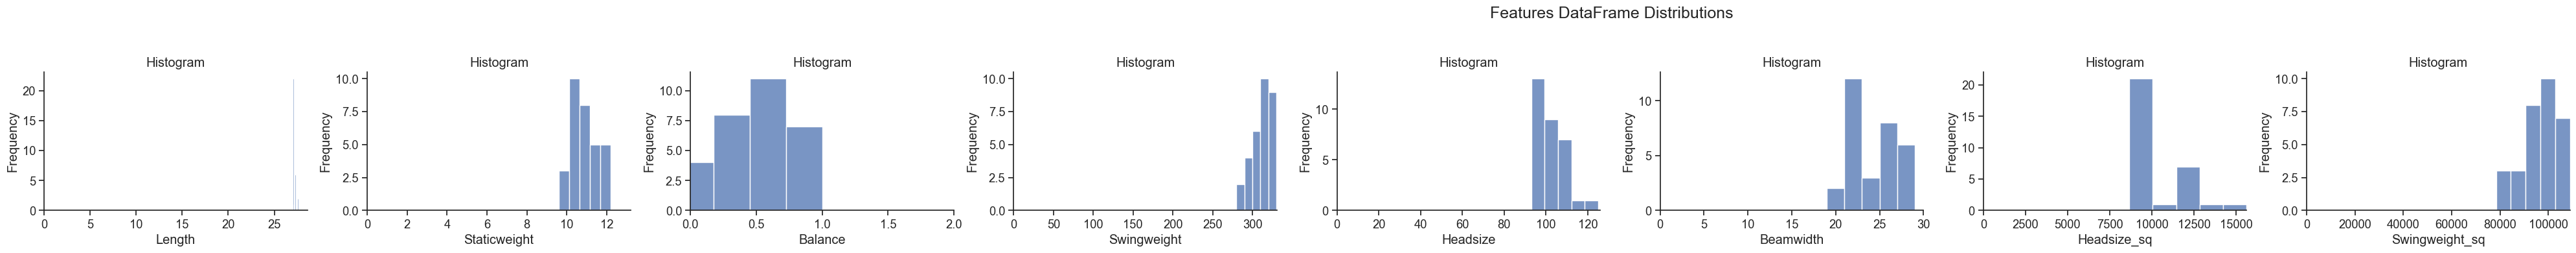

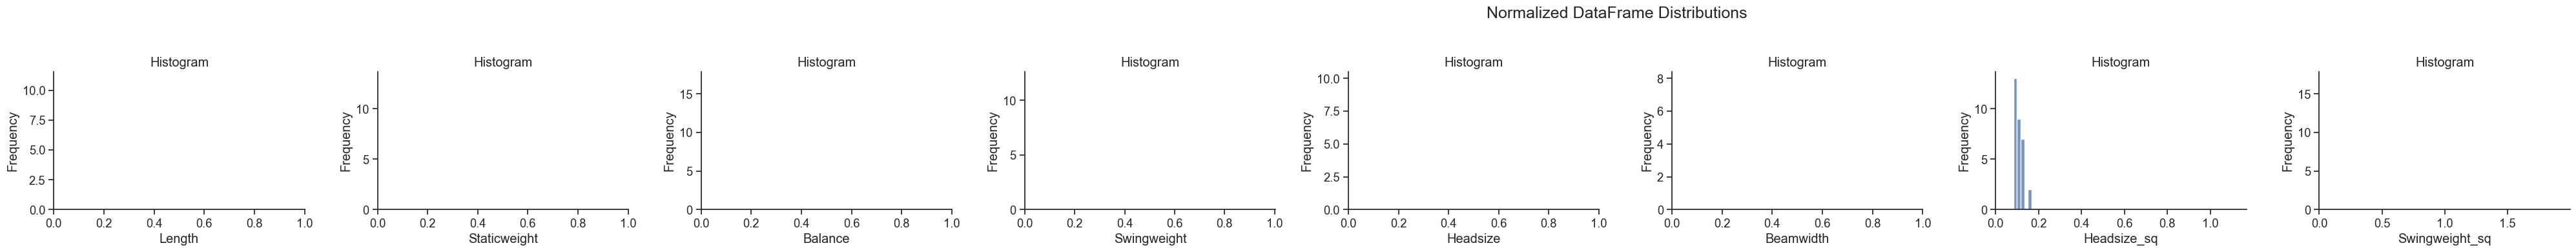

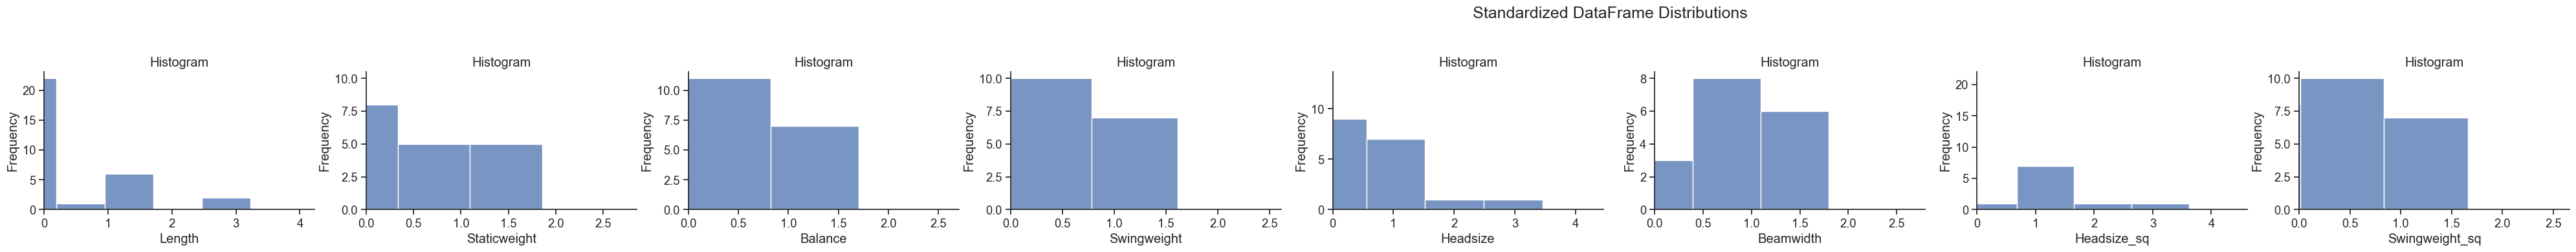

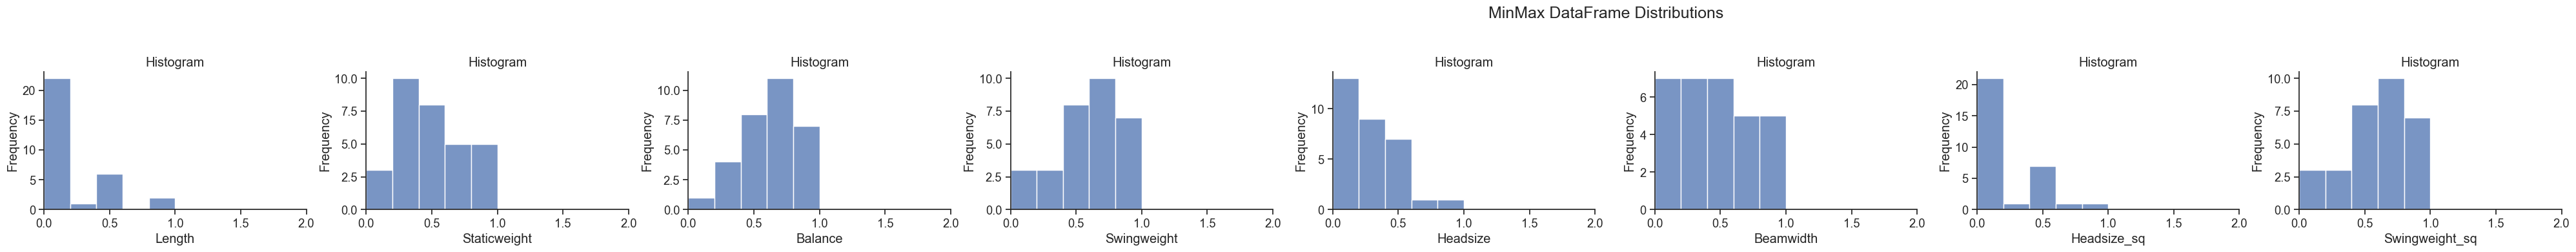

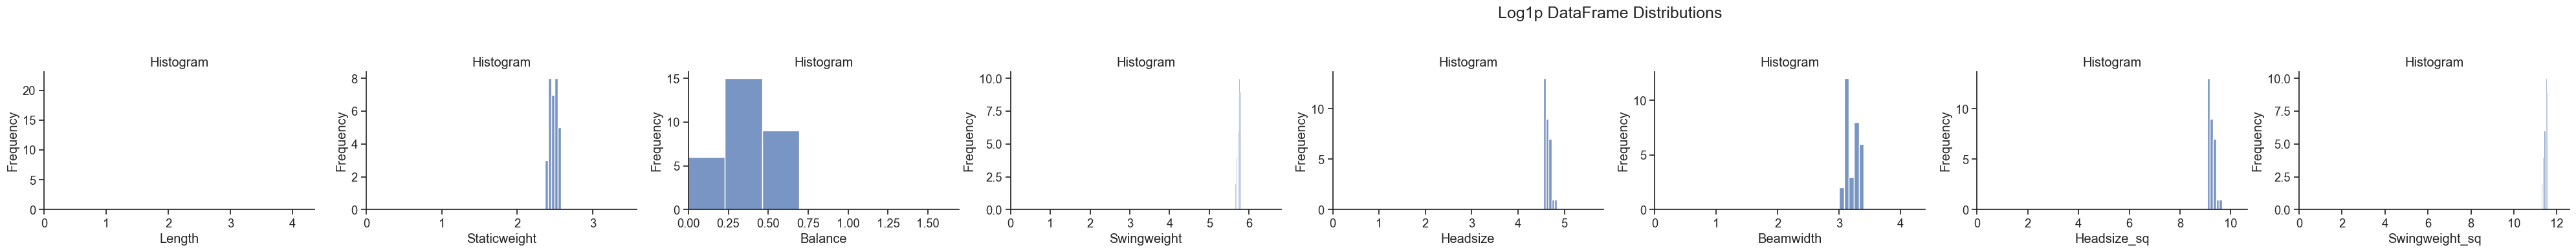

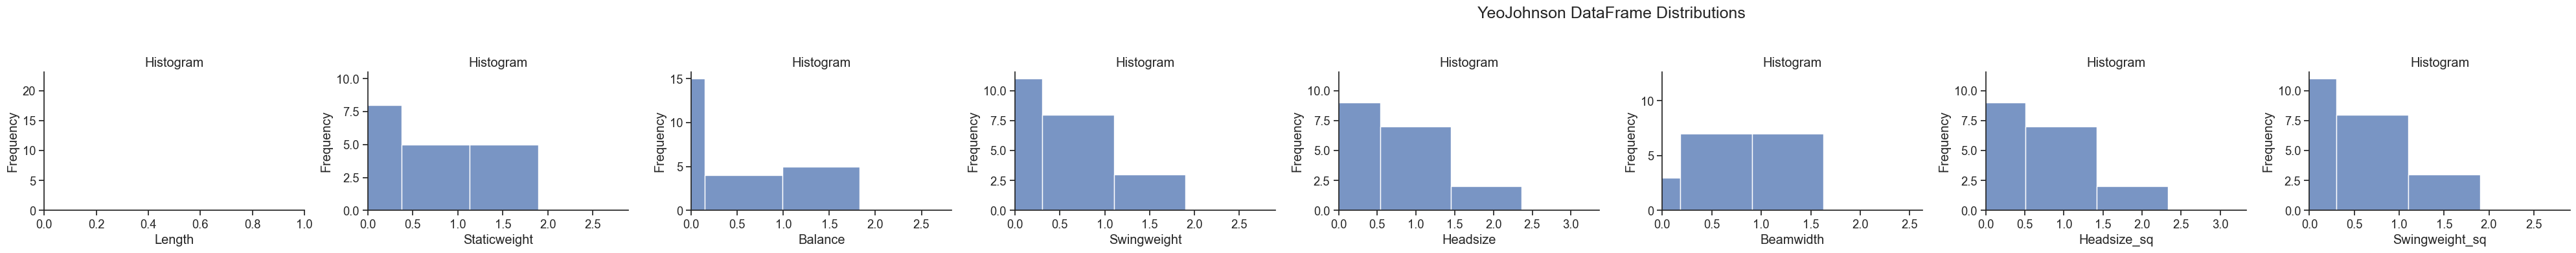

In [70]:
import math
dfs = [
    ("Features", df_feature_engineered),
    ("Normalized", df_norm),
    ("Standardized", df_standard),
    ("MinMax", df_minmax),
    ("Log1p", df_log),
    ("YeoJohnson", df_yeo),
]

for name, data in dfs:
    # pick up all numeric columns in this df
    numeric_cols = data.select_dtypes(include="number").columns.tolist()
    n = len(numeric_cols)
    if n == 0:
        continue

    # decide grid shape
    ncols = 10
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, numeric_cols):
        histogram(
            df=data, x_axis=col, num_bins=5, output_path=Path, save=False, ax=ax)
        ax.set_title("Histogram")

    # hide any extra axes
    for ax in axes[n:]:
        ax.set_visible(False)

    plt.suptitle(f"{name} DataFrame Distributions", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Box Plot's

### Violin Plot's